# ✅ Step 1: Import necessary libraries

In [6]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.applications import (
    VGG16, ResNet50, MobileNetV2, EfficientNetB0,
    DenseNet121, InceptionV3, NASNetMobile, Xception
)
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg_preprocess
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_preprocess
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as mobilenet_preprocess
from tensorflow.keras.applications.efficientnet import preprocess_input as efficientnet_preprocess
from tensorflow.keras.applications.densenet import preprocess_input as densenet_preprocess
from tensorflow.keras.applications.inception_v3 import preprocess_input as inception_preprocess
from tensorflow.keras.applications.nasnet import preprocess_input as nasnet_preprocess
from tensorflow.keras.applications.xception import preprocess_input as xception_preprocess

# ✅ Step 2: Load one test image from CIFAR-100

In [7]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data(label_mode='fine')
img = x_test[0]  # shape: (32, 32, 3)
img = tf.image.resize(img, (224, 224))
img = tf.expand_dims(img, 0)  # shape: (1, 224, 224, 3)

# ✅ Step 3: Define CNN Models with Metadata

In [8]:
model_configs = {
    "VGG16": {
        "model": VGG16, "pre": vgg_preprocess,
        "activation": "ReLU",
        "kernel": "Regular"
    },
    "ResNet50": {
        "model": ResNet50, "pre": resnet_preprocess,
        "activation": "ReLU + Identity",
        "kernel": "Regular + Dilated (some variants)"
    },
    "MobileNetV2": {
        "model": MobileNetV2, "pre": mobilenet_preprocess,
        "activation": "ReLU6 + Linear",
        "kernel": "Modified Depthwise Separable + Pointwise"
    },
    "EfficientNetB0": {
        "model": EfficientNetB0, "pre": efficientnet_preprocess,
        "activation": "Swish",
        "kernel": "Modified Depthwise Separable"
    },
    "DenseNet121": {
        "model": DenseNet121, "pre": densenet_preprocess,
        "activation": "ReLU",
        "kernel": "Regular"
    },
    "InceptionV3": {
        "model": InceptionV3, "pre": inception_preprocess,
        "activation": "ReLU",
        "kernel": "Pointwise + Regular"
    },
    "NASNetMobile": {
        "model": NASNetMobile, "pre": nasnet_preprocess,
        "activation": "ReLU",
        "kernel": "Depthwise Separable + Pointwise"
    },
    "Xception": {
        "model": Xception, "pre": xception_preprocess,
        "activation": "ReLU",
        "kernel": "Depthwise Separable + Pointwise"
    }
}

# ✅ Step 4: Visualize Feature Maps from Mid-Layers

In [9]:
def show_feature_maps(model_name, model_fn, preprocess_fn, activation, kernel):
    print(f"\n🔍 {model_name} - Activation: {activation} | Kernel Type: {kernel}")

    base_model = model_fn(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    pre_img = preprocess_fn(img)

    # Choose a middle layer
    layer_index = min(50, len(base_model.layers) - 1)
    layer_name = base_model.layers[layer_index].name
    feature_extractor = Model(inputs=base_model.input, outputs=base_model.get_layer(layer_name).output)
    feature_map = feature_extractor.predict(pre_img)

    print(f"➡️ Feature Map Shape: {feature_map.shape} | Layer: {layer_name}")

    # Show first 6 channels
    plt.figure(figsize=(16, 4))
    for i in range(6):
        plt.subplot(1, 6, i + 1)
        plt.imshow(feature_map[0, :, :, i], cmap='magma')
        plt.axis('off')
    plt.suptitle(f"{model_name} | Mid-layer: {layer_name}", fontsize=14)
    plt.show()

# ✅ Step 5: Run All


🔍 VGG16 - Activation: ReLU | Kernel Type: Regular
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
➡️ Feature Map Shape: (1, 7, 7, 512) | Layer: block5_pool


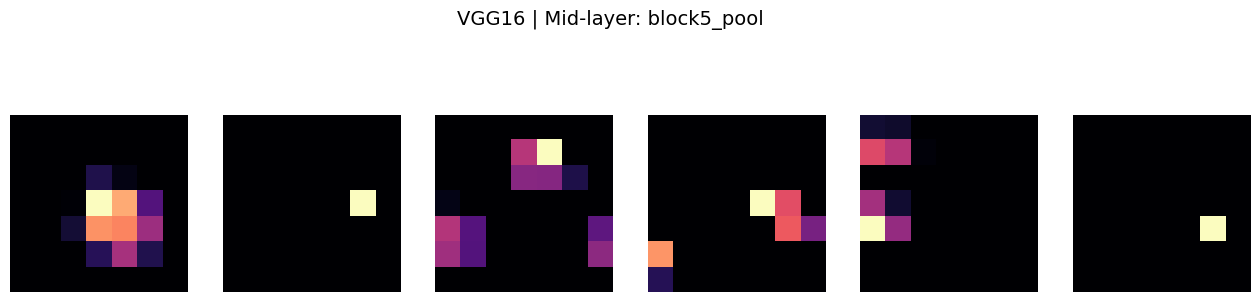


🔍 ResNet50 - Activation: ReLU + Identity | Kernel Type: Regular + Dilated (some variants)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 662ms/step
➡️ Feature Map Shape: (1, 28, 28, 512) | Layer: conv3_block1_out


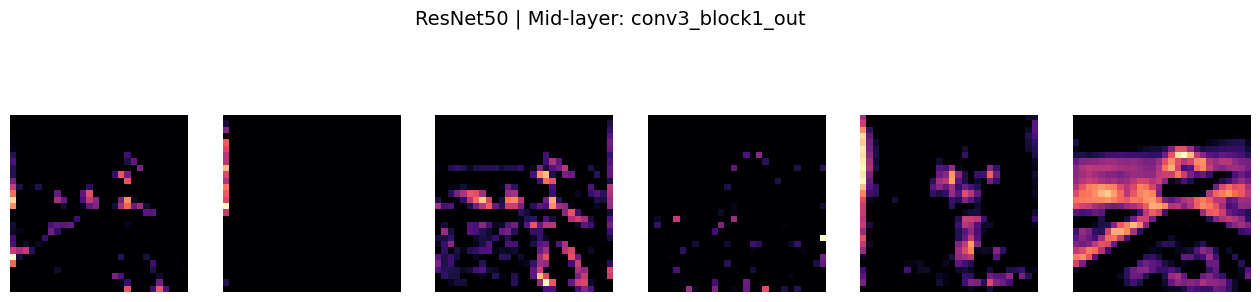


🔍 MobileNetV2 - Activation: ReLU6 + Linear | Kernel Type: Modified Depthwise Separable + Pointwise
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step
➡️ Feature Map Shape: (1, 28, 28, 192) | Layer: block_5_depthwise_relu


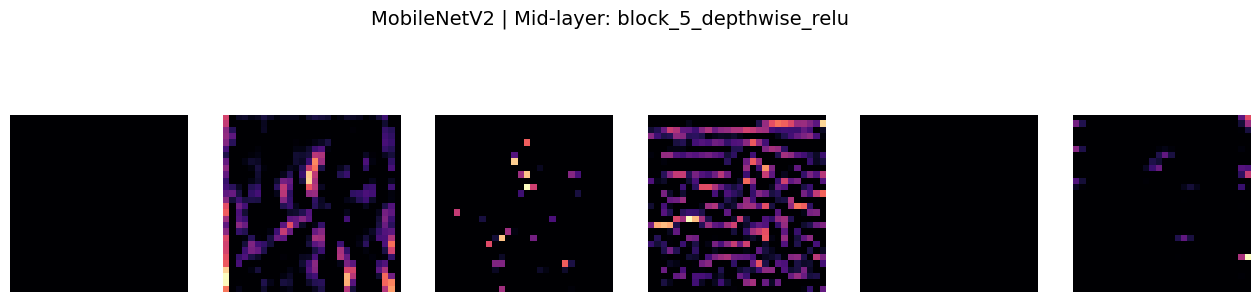


🔍 EfficientNetB0 - Activation: Swish | Kernel Type: Modified Depthwise Separable
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 650ms/step
➡️ Feature Map Shape: (1, 59, 59, 144) | Layer: block3a_dwconv_pad


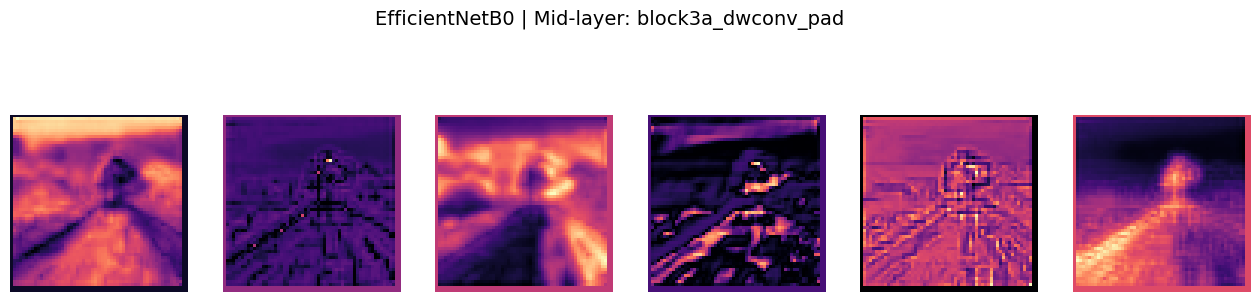


🔍 DenseNet121 - Activation: ReLU | Kernel Type: Regular
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 551ms/step
➡️ Feature Map Shape: (1, 56, 56, 256) | Layer: pool2_relu


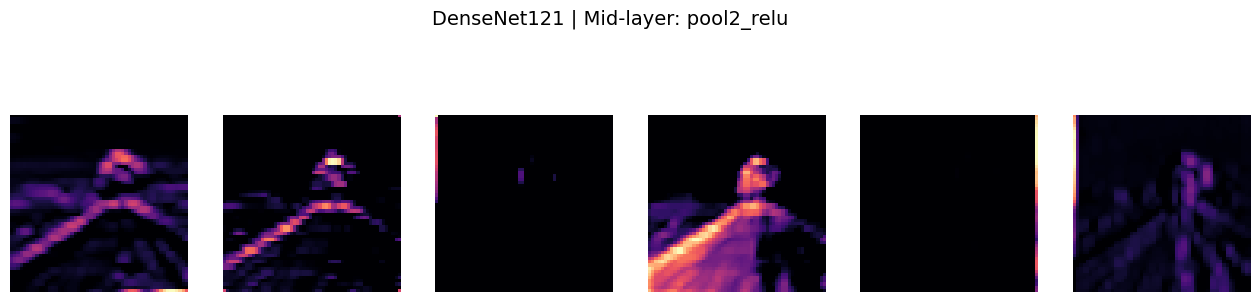


🔍 InceptionV3 - Activation: ReLU | Kernel Type: Pointwise + Regular
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step
➡️ Feature Map Shape: (1, 25, 25, 256) | Layer: average_pooling2d_19


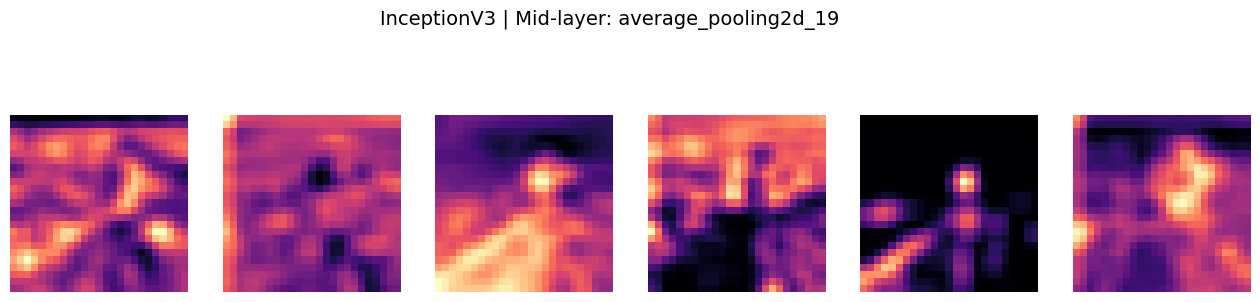


🔍 NASNetMobile - Activation: ReLU | Kernel Type: Depthwise Separable + Pointwise
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step
➡️ Feature Map Shape: (1, 56, 56, 11) | Layer: add_32


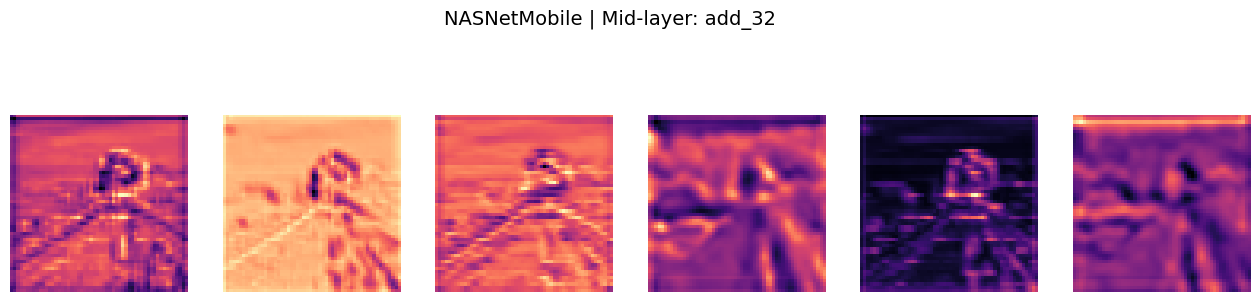


🔍 Xception - Activation: ReLU | Kernel Type: Depthwise Separable + Pointwise
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 764ms/step
➡️ Feature Map Shape: (1, 14, 14, 728) | Layer: block6_sepconv2


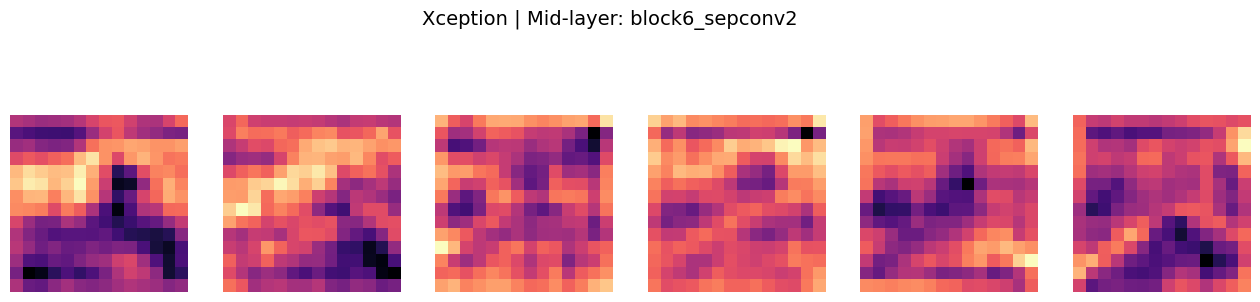

In [11]:
for name, config in model_configs.items():
    show_feature_maps(name, config['model'], config['pre'], config['activation'], config['kernel'])